# Анализ сервиса долгосрочной аренды автомобилей

In [ ]:
# Изучаем данные, поступающие с веб-сайта, и отвечаем на ряд вопросов, например, 
# о характеристике пользователей и общей статистике по посещаемости,
# из каких источников (кампаний, устройств, локаций) идёт самый целевой трафик (и с точки зрения объёма трафика, 
# и с точки зрения CR)?
# Какие авто пользуются наибольшим спросом? 
# У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?
# Стоит ли увеличивать своё присутствие в соцсетях и давать там больше рекламы?

In [ ]:
# Целевое действие — события типа «Оставить заявку» и «Заказать звонок» 
# (ga_hits.event_action in ['sub_car_claim_click', 'sub_car_claim_submit_click', 
# 'sub_open_dialog_click', 'sub_custom_question_submit_click', 
# 'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 
# 'sub_car_request_submit_click']).

# CR (Conversion Rate) — показатель конверсии из визита (уникальный 
# session_id) в любое целевое действие в рамках одного визита (в случае 
# наличия >1 целевого действия — считать все как одно).

# Органический трафик — все визиты с ga_sessions.utm_medium in ('organic', 
# 'referral', '(none)').

# Платный трафик — весь неорганический трафик.

# Информация про марку и модель авто — содержится в ga_hits.hit_page_path.

# Реклама в социальных сетях — все визиты с ga_sessions.utm_source in 
# ('QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 
# IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 
# 'gVRrcxiDQubJiljoTbGm').

In [1]:
# импорт библиотек

import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Данные из Google Analytics (last-click attribution model) 
# GA Sessions
# Одна строка = один визит на сайт

In [3]:
# Описание атрибутов:
# session_id — ID визита;
# client_id — ID посетителя;
# visit_date — дата визита;
# visit_time — время визита;
# visit_number — порядковый номер визита клиента;
# utm_source — канал привлечения;
# utm_medium — тип привлечения;
# utm_campaign — рекламная кампания;
# utm_keyword — ключевое слово;
# device_category — тип устройства;
# device_os — ОС устройства;
# device_brand — марка устройства;
# device_model — модель устройства;
# device_screen_resolution — разрешение экрана;
# device_brand — марка устройства;
# device_model — модель устройства;
# device_screen_resolution — разрешение экрана;
# device_browser — браузер;
# geo_country — страна;
# geo_city — город

In [4]:
# изучим данные

ga_sessions = pd.read_csv('ga_sessions.csv')
ga_sessions.head()

C:\Users\Julia\AppData\Local\Temp\ipykernel_11260\2837517684.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  ga_sessions = pd.read_csv('ga_sessions.csv')


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [12]:
ga_sessions.shape

(1860042, 18)

In [13]:
print(f'Размер выборки: {ga_sessions.shape[0]}, {ga_sessions.shape[1]}')

Размер выборки: 1860042, 18


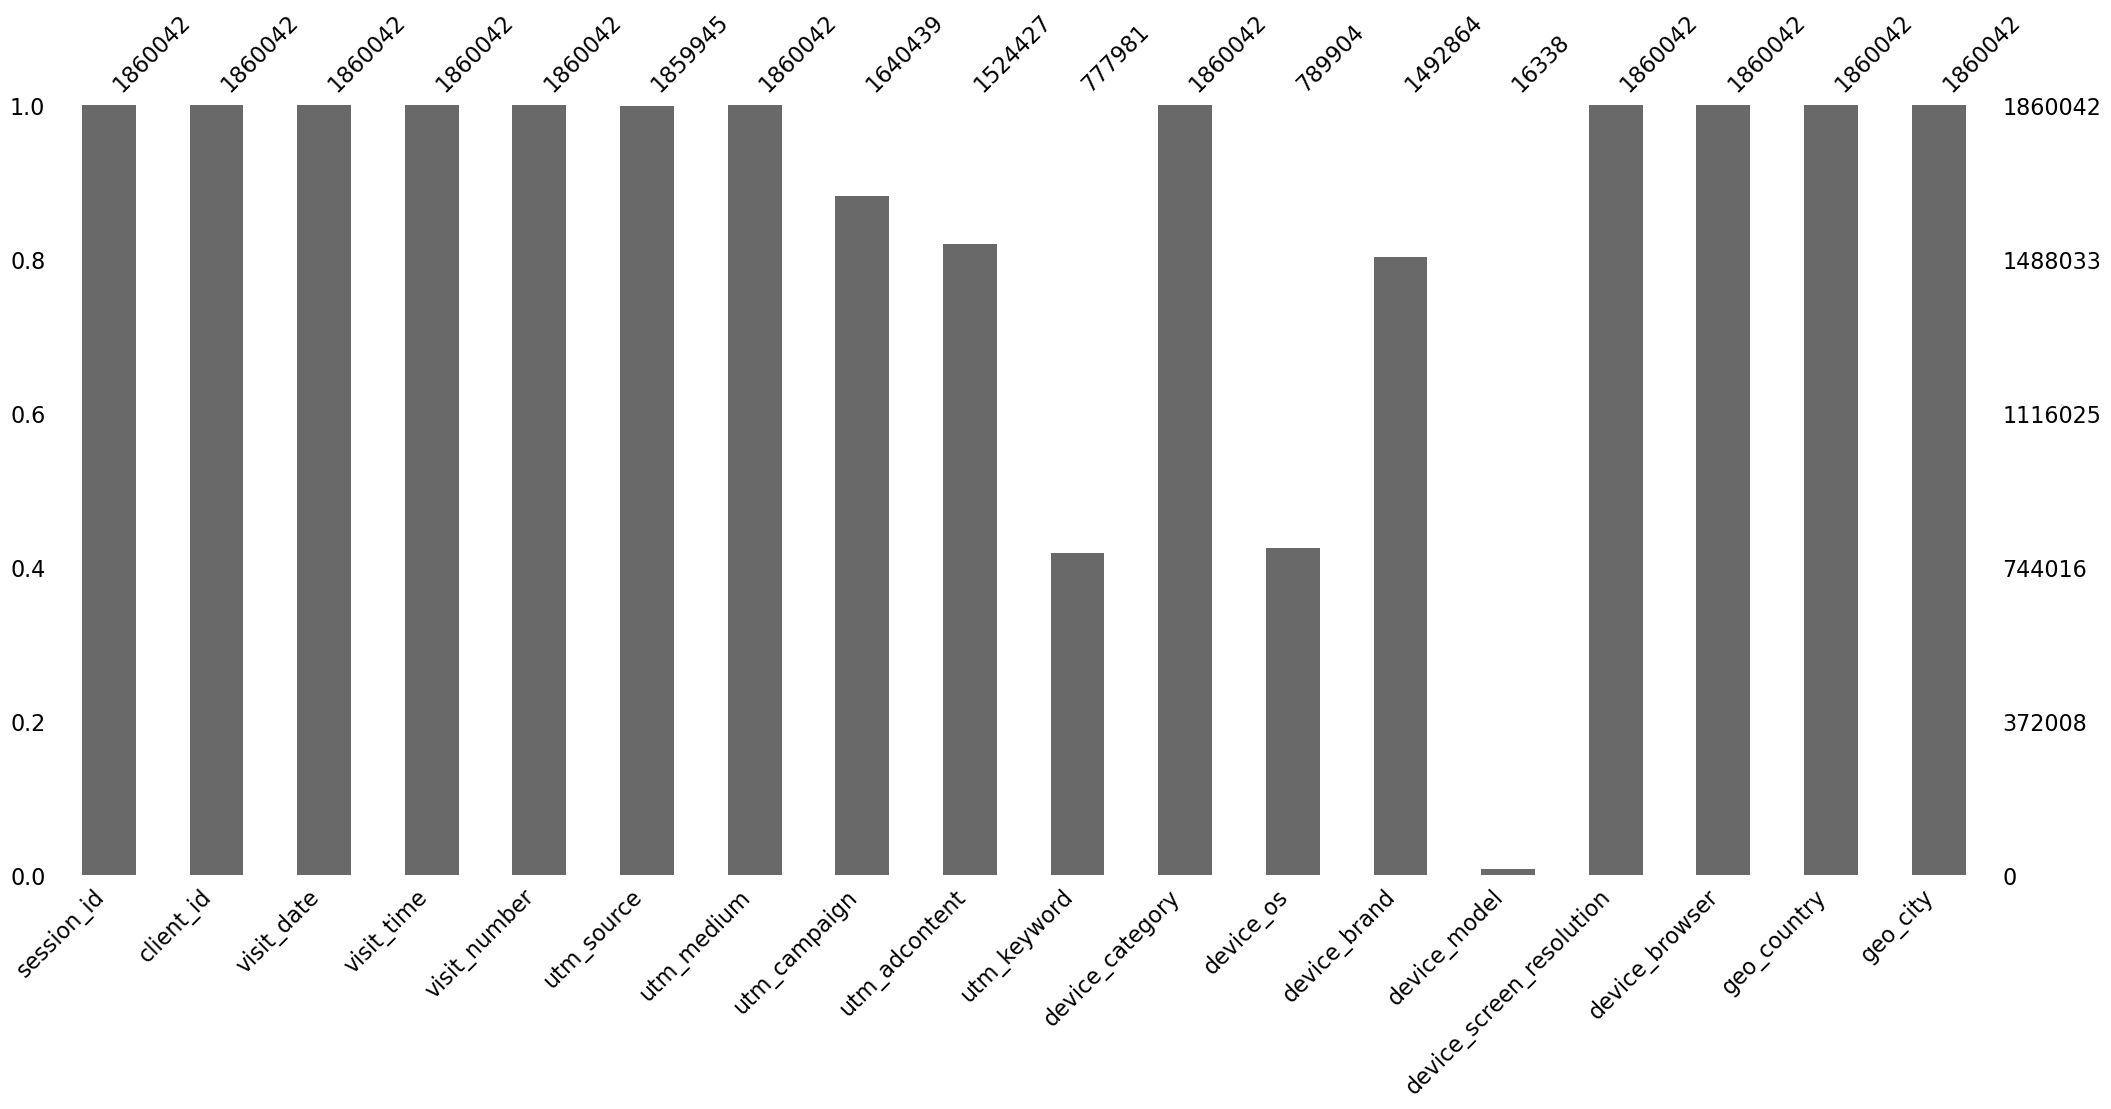

In [14]:
# объем пропусков в данных

msno.bar(ga_sessions);

In [15]:
# почти пустой столбец
ga_sessions.device_model.value_counts(dropna=False)

device_model
NaN                     1843704
AuMdmADEIoPXiWpTsBEj       9778
tWBQlsvNfHxRUjaPAfhd        653
cwMJxNXiWUgMUxGiCTPs        651
pTgAEPipQxDXCjPrJbHo        461
                         ...   
LDCqZZOpaddysclyNkHj          1
MBGYWAQSYWUphNxTsAWD          1
VDidzTqFGxuqiRQJGrwB          1
aWSBcBZlKorTFjJGlWKG          1
niQdLVcBlNylrEuNcCYH          1
Name: count, Length: 105, dtype: int64

In [16]:
ga_sessions_clean = ga_sessions.copy()

In [17]:
ga_sessions_clean = ga_sessions_clean.drop(columns=['device_model'])
ga_sessions_clean.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow


In [18]:
ga_sessions_clean.shape

(1860042, 17)

In [19]:
# дубликатов нет

ga_sessions_clean[ga_sessions_clean.duplicated()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city


In [20]:
ga_sessions_clean.session_id.nunique()

1860042

In [21]:
#  GA Hits
# Одна строка = одно событие в рамках одного визита на сайт

In [22]:
# Описание атрибутов:
# session_id — ID визита;
# hit_date — дата события;
# hit_time — время события;
# hit_number — порядковый номер события в рамках сессии;
# hit_type — тип события;
# hit_referer — источник события;
# hit_page_path — страница события;
# event_category — тип действия;
# event_action — действие;
# event_label — тег действия;
# event_value — значение результата действия

In [23]:
ga_hits = pd.read_csv('ga_hits.csv')
ga_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [24]:
ga_hits.shape

(15726470, 11)

In [25]:
print(f'Размер выборки: {ga_hits.shape[0]}, {ga_hits.shape[1]}')

Размер выборки: 15726470, 11


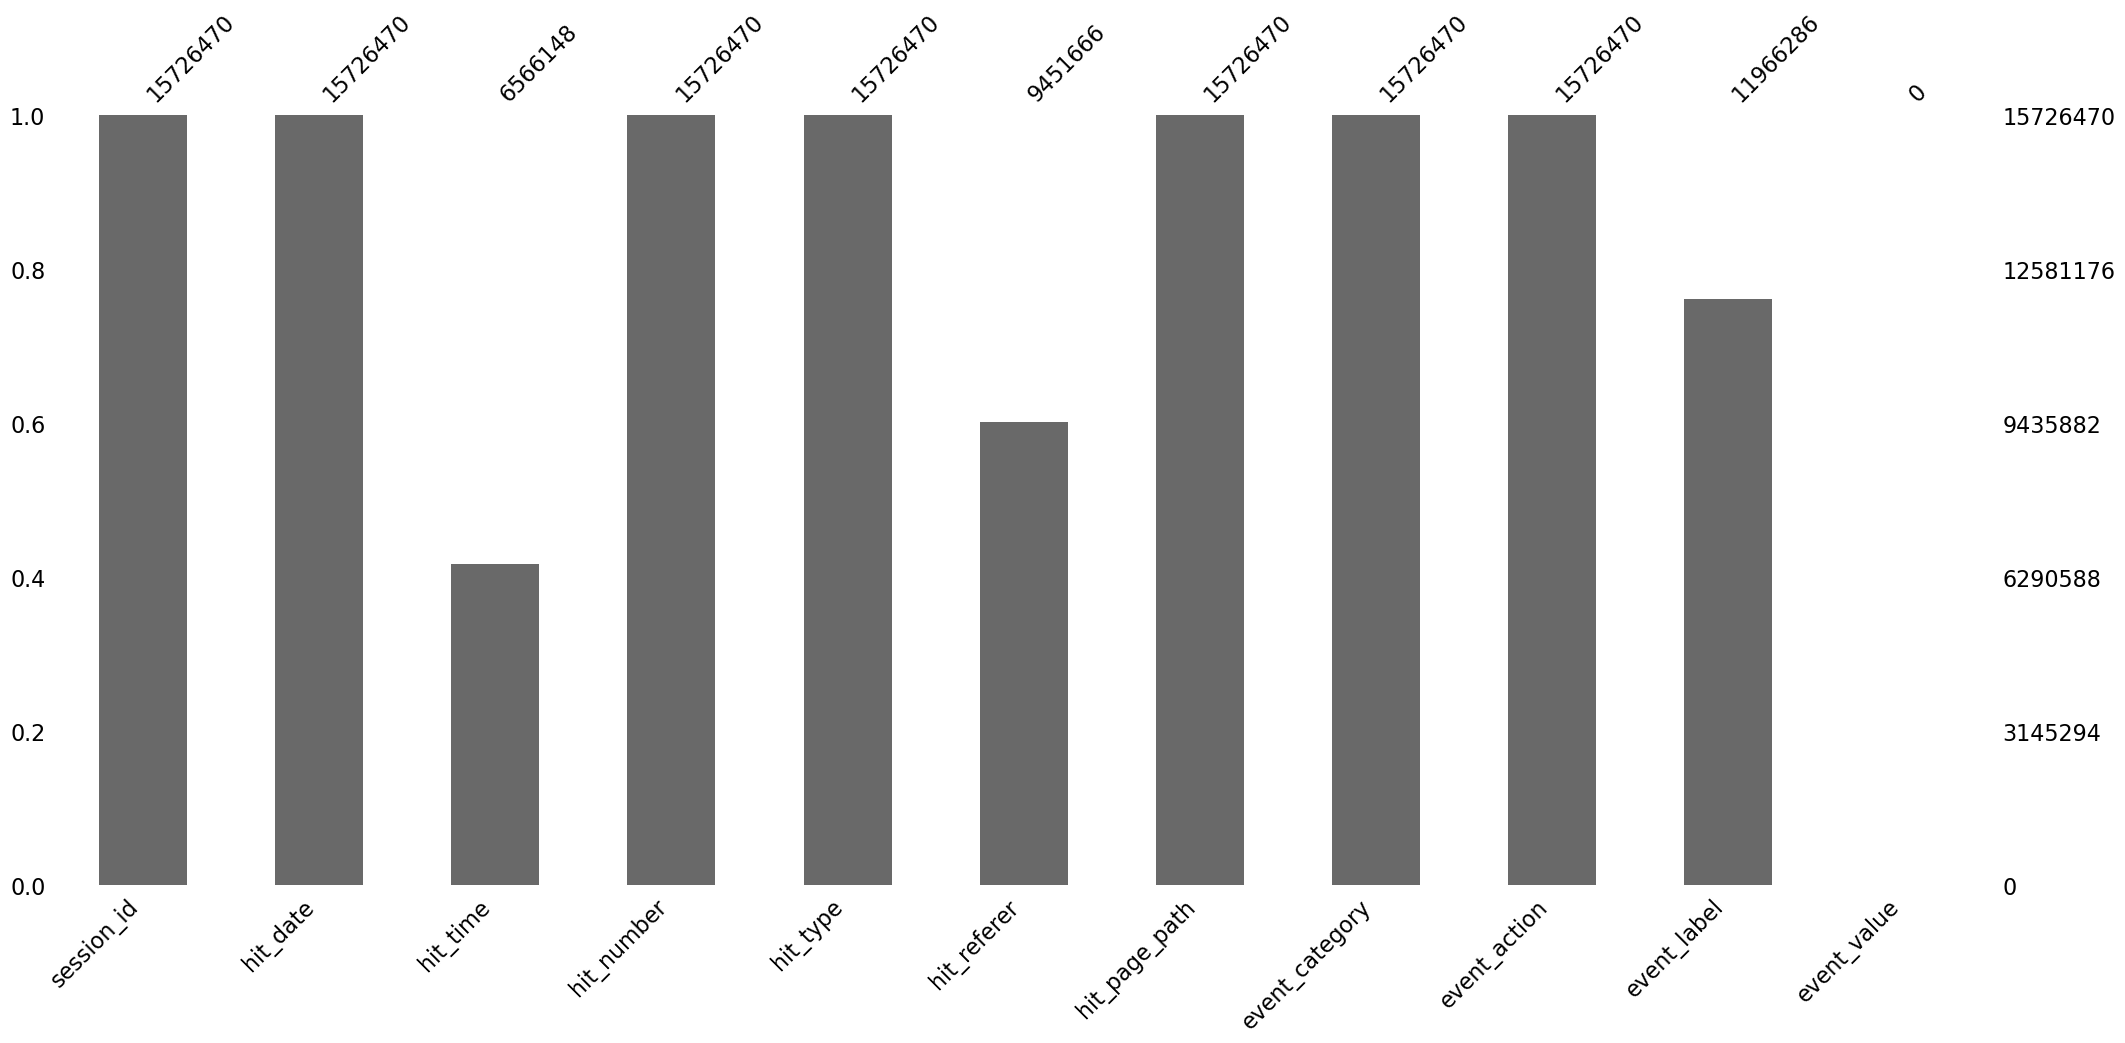

In [26]:
msno.bar(ga_hits);

In [27]:
ga_hits.event_value.value_counts(dropna=False)

event_value
NaN    15726470
Name: count, dtype: int64

In [28]:
ga_hits_clean = ga_hits.copy()

In [29]:
# удалим неинформативные колонки

ga_hits_clean = ga_hits_clean.drop(columns=['event_value', 'event_label', 'event_category', 'hit_referer', 'hit_type'])
ga_hits_clean.head()

,session_id,hit_date,hit_time,hit_number,hit_page_path,event_action
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,sberauto.com/cars?utm_source_initial=google&ut...,quiz_show
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz_show
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz_show
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz_show
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz_show


In [30]:
ga_hits_clean.shape

(15726470, 6)

In [31]:
# дубликатов нет

ga_hits_clean[ga_hits_clean.duplicated()]

,session_id,hit_date,hit_time,hit_number,hit_page_path,event_action


In [32]:
# пустые значения

ga_hits_clean.isna().sum()

session_id             0
hit_date               0
hit_time         9160322
hit_number             0
hit_page_path          0
event_action           0
dtype: int64

In [33]:
# количество уникальных

ga_hits_clean.session_id.nunique()

1734610

In [34]:
ga_hits_clean.event_action.nunique()

230

In [35]:
# в этой колонке целевые и нецелевые действия

ga_hits_clean.event_action.unique()

array(['quiz_show', 'view_card', 'sub_landing', 'photos_all',
       'quiz_start', 'search_kpp', 'start_auth', 'start_chat',
       'go_to_offer', 'name_entered', 'view_new_card', 'search_color',
       'search_drive', 'search_km_to', 'user_message', 'analystlabel',
       'click_on_logo', 'click_on_menu', 'phone_entered', 'search_engine',
       'sub_view_cars_click', 'go_to_car_card', 'search_form_clear',
       'search_km_from', 'view_used_card', 'search_power_to',
       'surname_entered', 'view_more_click', 'showed_number_ads',
       'listing_ads_sort', 'pagination_click', 'phone_auth_start',
       'search_body_type', 'show_phone_input', 'sub_account_page',
       'click_on_get_code', 'search_power_from', 'search_form_region',
       'patronymic_entered', 'sber_id_auth_start', 'sub_submit_success',
       'search_form_rental', 'click_on_yes_its_me', 'search_form_cost_to',
       'search_form_year_to', 'show_sms_code_input',
       'sub_car_claim_click', 'click_on_subscription',


In [36]:
# формирование нового атрибута
# 1 - если целевое действие, 0 - если нет

ga_hits_clean['target_action'] = ga_hits_clean.apply(lambda x: 1 if x.event_action in ['sub_car_claim_click', 'sub_car_claim_submit_click', 
'sub_open_dialog_click', 'sub_custom_question_submit_click', 
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 
'sub_car_request_submit_click'] else 0, axis=1)

In [37]:
ga_hits_clean.head()

,session_id,hit_date,hit_time,hit_number,hit_page_path,event_action,target_action
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,sberauto.com/cars?utm_source_initial=google&ut...,quiz_show,0
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz_show,0
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz_show,0
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz_show,0
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz_show,0


In [38]:
ga_hits_clean.shape

(15726470, 7)

In [39]:
ga_hits_clean.target_action.value_counts()

target_action
0    15621562
1      104908
Name: count, dtype: int64

In [40]:
# целевой атрибут полностью заполнен
ga_hits_clean.target_action.isna().sum()

0

In [41]:
# проверим, что target_action присвоен правильно

ga_hits_clean[ga_hits_clean['target_action'] == 1]

,session_id,hit_date,hit_time,hit_number,hit_page_path,event_action,target_action
4016,2744563715298057088.1640258436.1640258436,2021-12-23,843092.0,81,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_submit_success,1
4045,3087297479839089634.1640268774.1640268774,2021-12-23,194144.0,22,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit_success,1
4046,3156966333326004302.1640206419.1640206800,2021-12-23,327223.0,63,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit_success,1
4047,3750243879753098158.1640272208.1640272208,2021-12-23,156992.0,20,sberauto.com/cars/all/nissan/x-trail/0744675f?...,sub_submit_success,1
4048,7518333712042258254.1640258901.1640258901,2021-12-23,170616.0,16,sberauto.com/cars/all/mercedes-benz/gla-klasse...,sub_submit_success,1
...,...,...,...,...,...,...,...
15725025,1277864870843199549.1636773954.1636773954,2021-11-13,354017.0,30,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_car_claim_submit_click,1
15725133,965861352491898977.1636751459.1636751459,2021-11-13,172590.0,18,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_submit_success,1
15725134,4727705172767122620.1636818847.1636818847,2021-11-13,356120.0,43,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_submit_success,1
15725135,4727705172767122620.1636818847.1636818847,2021-11-13,312303.0,41,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_open_dialog_click,1


In [42]:
# Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?

In [43]:
# посмотрим на структуру строки

s = ga_hits_clean.loc[4041:4050,'hit_page_path']
print(s)

4041    sberauto.com/cars?yzclid=2658716597616008755&r...
4042    sberauto.com/cars?utm_source_initial=sber&utm_...
4043    sberauto.com/cars?utm_source_initial=youtube&u...
4044    sberauto.com/cars?utm_source_initial=yandex&ut...
4045    sberauto.com/cars/all/skoda/rapid/bf24b977?utm...
4046    sberauto.com/cars/all/skoda/rapid/bf24b977?utm...
4047    sberauto.com/cars/all/nissan/x-trail/0744675f?...
4048    sberauto.com/cars/all/mercedes-benz/gla-klasse...
4049    sberauto.com/cars/all/renault/logan/8c3c73f2?r...
4050    sberauto.com/cars/all/renault/logan/8c3c73f2?r...
Name: hit_page_path, dtype: object


In [44]:
ga_hits_cars2 = ga_hits_clean.copy()

In [45]:
# добавление новой колонки с авто

ga_hits_cars2['car_model'] = ga_hits_cars2['hit_page_path'].apply(lambda x: x.lower().split('/')[3] if 'all' in x.split('/') else 'other')
ga_hits_cars2['car_model']

0                   other
1                   other
2              volkswagen
3                   other
4           mercedes-benz
                ...      
15726465           toyota
15726466    mercedes-benz
15726467           toyota
15726468              bmw
15726469              bmw
Name: car_model, Length: 15726470, dtype: object

In [46]:
ga_hits_cars2.car_model.describe()

count     15726470
unique          21
top          other
freq      12311655
Name: car_model, dtype: object

In [47]:
# авто, которые пользуются наибольшим спросом с точки зрения объема трафика (нецелевого и целевого), по убыванию:

ga_hits_cars2.car_model.value_counts()

car_model
other            12311655
skoda              744516
mercedes-benz      472316
volkswagen         417128
lada-vaz           403910
nissan             238701
kia                236270
bmw                195404
toyota             160840
renault            150656
porsche             63569
lexus               61631
audi                60035
volvo               51627
haval               51538
mini                34709
peugeot             27431
land-rover          24872
hyundai             19054
honda                 397
infiniti              211
Name: count, dtype: int64

In [48]:
df_full_cars = ga_hits_cars2[['car_model', 'target_action']]
df_full_cars

,car_model,target_action
0,other,0
1,other,0
2,volkswagen,0
3,other,0
4,mercedes-benz,0
...,...,...
15726465,toyota,0
15726466,mercedes-benz,0
15726467,toyota,0
15726468,bmw,0


In [49]:
df_full_cars.value_counts()

car_model      target_action
other          0                12238634
skoda          0                  736255
mercedes-benz  0                  469876
volkswagen     0                  412072
lada-vaz       0                  398554
nissan         0                  237315
kia            0                  233535
bmw            0                  194011
toyota         0                  159177
renault        0                  149200
other          1                   73021
porsche        0                   63438
lexus          0                   61372
audi           0                   59869
volvo          0                   51379
haval          0                   50956
mini           0                   34639
peugeot        0                   27283
land-rover     0                   24826
hyundai        0                   18588
skoda          1                    8261
lada-vaz       1                    5356
volkswagen     1                    5056
kia            1            

In [50]:
# показатель CR (Conversion Rate) в целевые события, по убыванию:

df_full_cars_CR = df_full_cars.groupby(['car_model'], as_index=False).agg({'target_action': 'mean'})
df_full_cars_CR = df_full_cars_CR.rename(columns={'target_action': 'CR'})
df_full_cars_CR.sort_values('CR', ascending=False)

,car_model,CR
5,infiniti,0.085308
4,hyundai,0.024457
3,honda,0.017632
7,lada-vaz,0.013260
19,volkswagen,0.012121
6,kia,0.011576
2,haval,0.011293
17,skoda,0.011096
18,toyota,0.010339
16,renault,0.009664


In [51]:
# У следующих авто самый лучший показатель CR (Conversion Rate) в целевые события, top-10 по убыванию:

df_full_cars_CR.sort_values('CR', ascending=False)[:10]

,car_model,CR
5,infiniti,0.085308
4,hyundai,0.024457
3,honda,0.017632
7,lada-vaz,0.013260
19,volkswagen,0.012121
6,kia,0.011576
2,haval,0.011293
17,skoda,0.011096
18,toyota,0.010339
16,renault,0.009664


In [ ]:
# соединим две таблицы

In [52]:
ga_all = pd.merge(left=ga_sessions_clean, right=ga_hits_clean.groupby('session_id')['target_action'].max(), on='session_id', how='inner')
ga_all.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_action
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0


In [53]:
ga_all.shape

(1732266, 18)

In [54]:
ga_all.target_action.value_counts()

target_action
0    1681952
1      50314
Name: count, dtype: int64

In [55]:
# дубликатов нет

ga_all[ga_all.duplicated()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_action


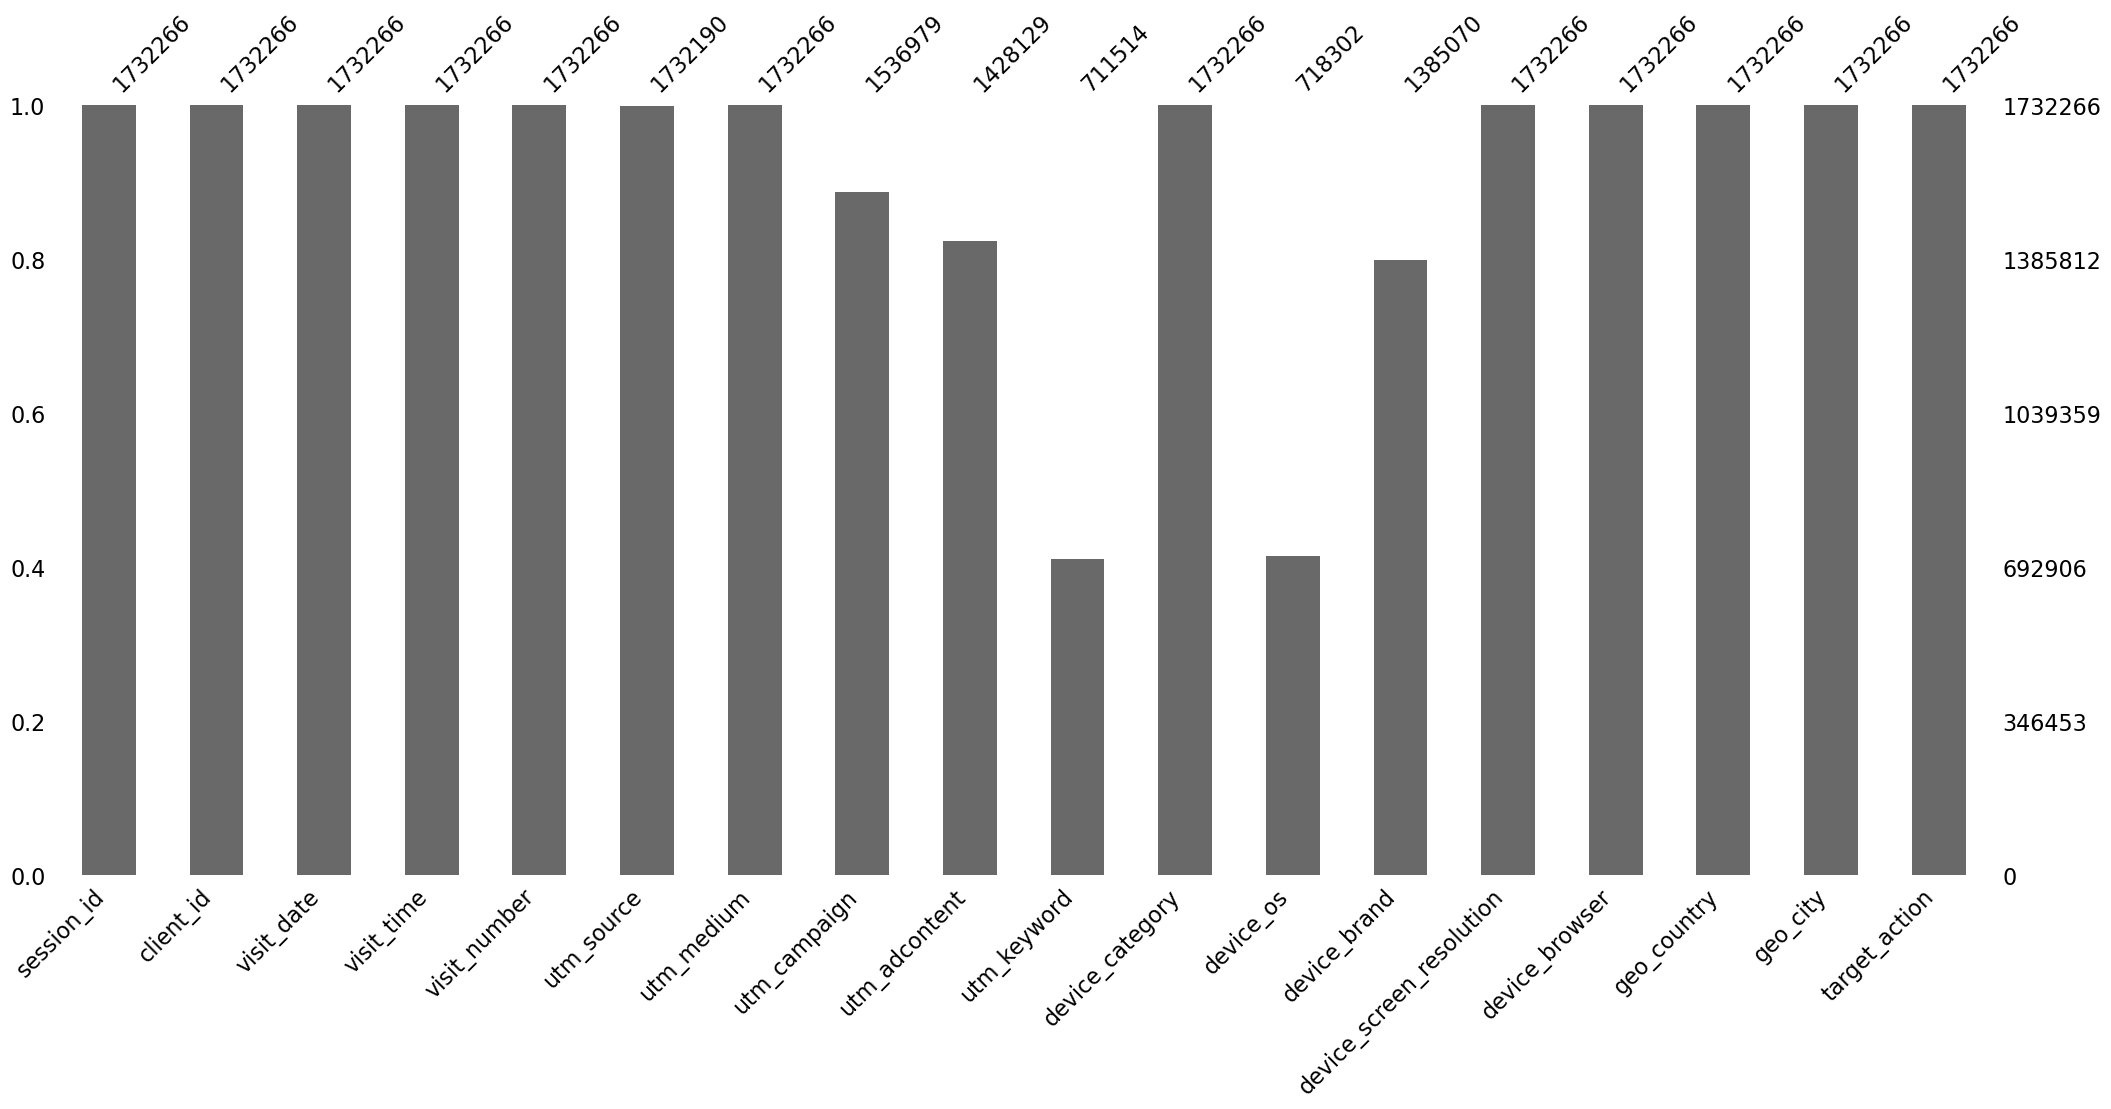

In [56]:
# количество пропусков

msno.bar(ga_all);

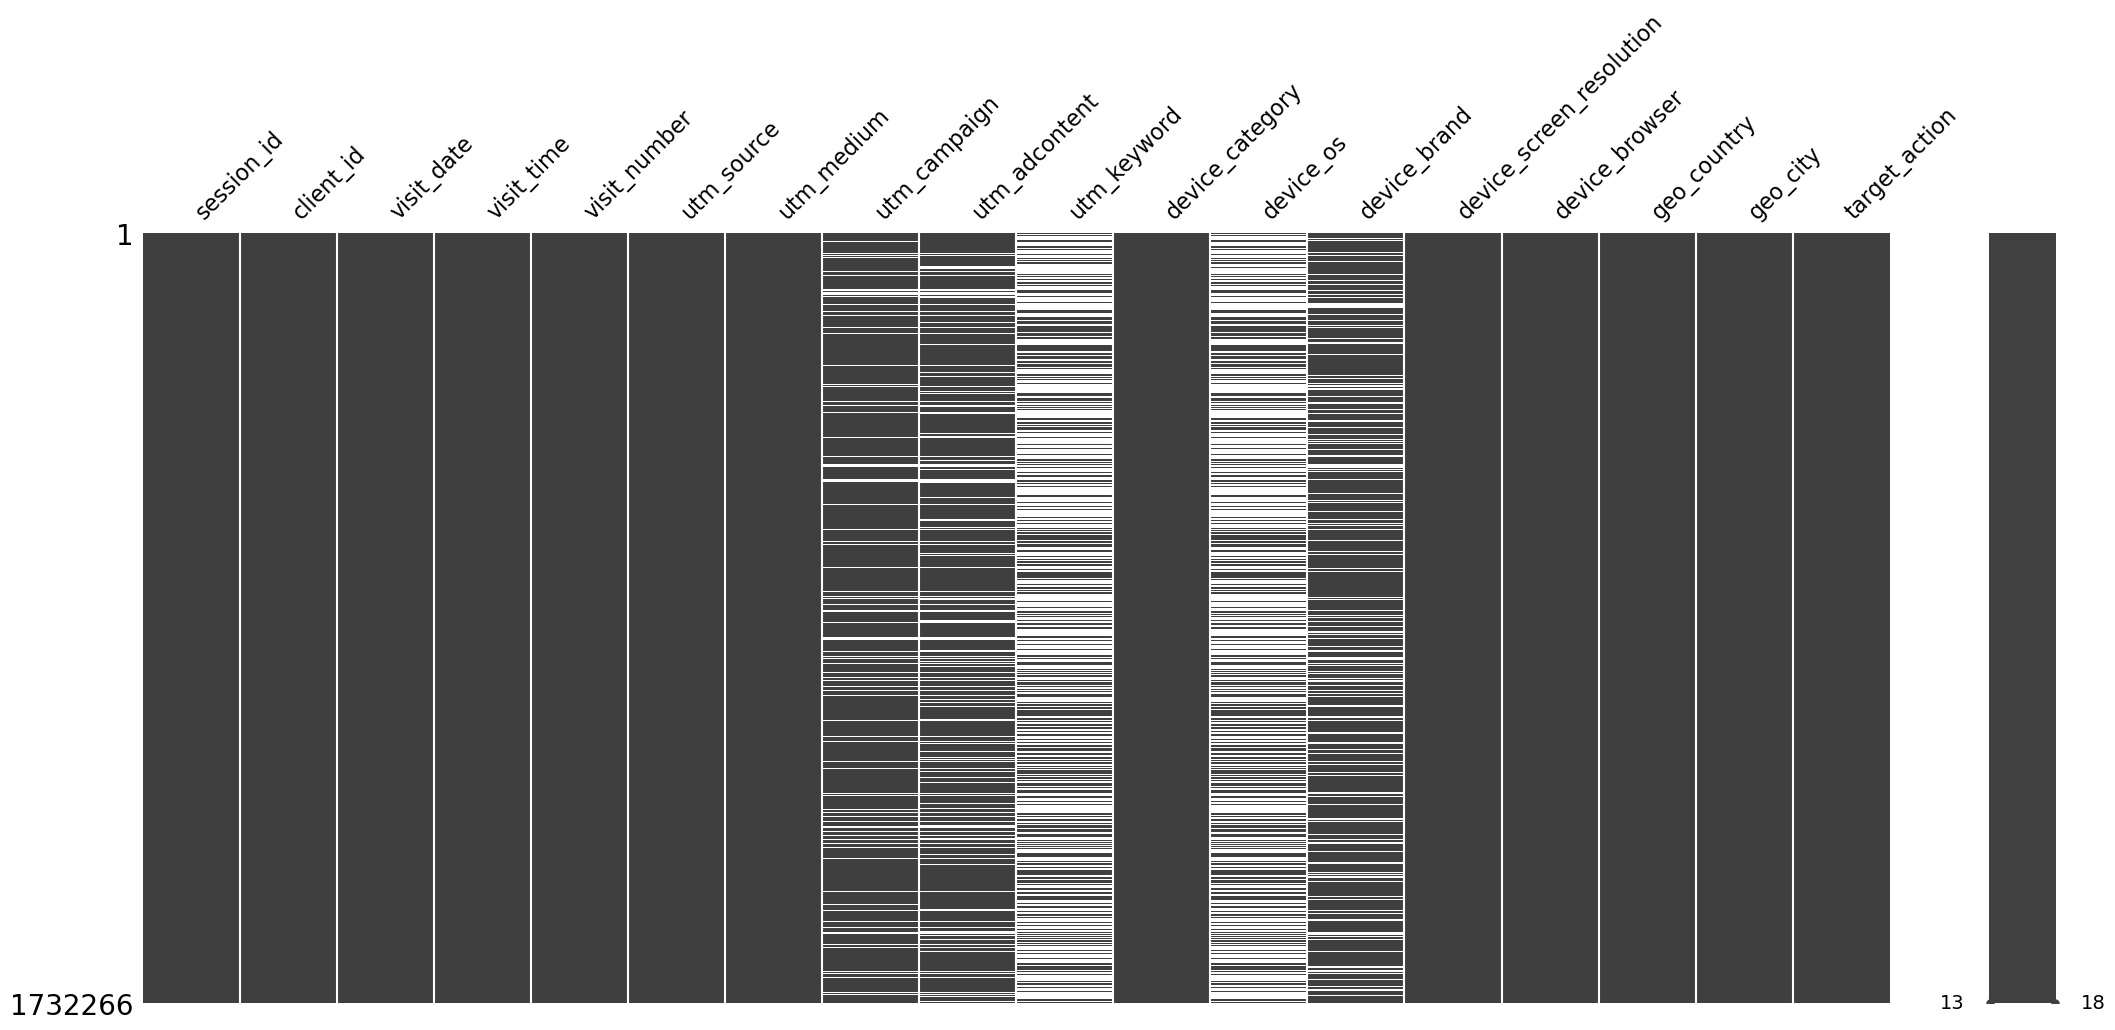

In [57]:
msno.matrix(ga_all);

In [58]:
ga_all.isna().sum()

session_id                        0
client_id                         0
visit_date                        0
visit_time                        0
visit_number                      0
utm_source                       76
utm_medium                        0
utm_campaign                 195287
utm_adcontent                304137
utm_keyword                 1020752
device_category                   0
device_os                   1013964
device_brand                 347196
device_screen_resolution          0
device_browser                    0
geo_country                       0
geo_city                          0
target_action                     0
dtype: int64

In [59]:
missing_values = ((ga_all.isna().sum() / len(ga_all)) * 100).sort_values()

print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


session_id                   0.000000
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
device_category              0.000000
geo_city                     0.000000
target_action                0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
client_id                    0.000000
utm_medium                   0.000000
utm_source                   0.004387
utm_campaign                11.273500
utm_adcontent               17.557177
device_brand                20.042880
device_os                   58.533966
utm_keyword                 58.925823
dtype: float64

In [60]:
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки:', 
          len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', 
          round(len(df.dropna()) / len(df) * 100, 2))
    

print_useful_rows_info(ga_all)

Количество полностью заполненных объектов из всей выборки: 529450
Процент полностью заполненных объектов из всей выборки: 30.56


In [61]:
# посмотрим колонки на информативность

In [62]:
ga_all.utm_keyword.values

array(['puhZPIYqKXeFPaUviSjo', 'IGUCNvHlhfHpROGclCit',
       'puhZPIYqKXeFPaUviSjo', ..., 'puhZPIYqKXeFPaUviSjo',
       'puhZPIYqKXeFPaUviSjo', 'oKjXDUsycmahkgMhGdAR'], dtype=object)

In [63]:
ga_all.device_os.unique()

array(['Android', nan, 'iOS', 'Windows', 'Linux', 'Macintosh',
       '(not set)', 'Chrome OS', 'BlackBerry', 'Tizen', 'Firefox OS',
       'Nokia', 'Samsung', 'Windows Phone'], dtype=object)

In [64]:
ga_all.device_brand.unique()

array(['Huawei', 'Samsung', 'Xiaomi', 'Apple', 'Lenovo', nan, 'Vivo',
       'Meizu', 'OnePlus', '(not set)', 'BQ', 'Realme', 'OPPO', 'itel',
       'Philips', 'Nokia', 'Alcatel', 'LG', 'Tecno', 'Asus', 'Infinix',
       'Sony', 'ZTE', 'Wiko', 'Google', 'Micromax', 'Blackview',
       'Oukitel', 'Motorola', 'HOMTOM', 'Cubot', 'DOOGEE', 'China Phone',
       'DEXP', 'Neffos', 'TP-Link', 'Hisense', 'Acer', 'Vsmart',
       'BlackBerry', 'Umidigi', 'Leagoo', 'Highscreen', 'Ulefone',
       'Symphony', 'LeEco', 'Prestigio', 'POCO', 'Vestel', 'Guophone',
       'Wileyfox', 'HTC', 'Vertex', 'CAT', 'InFocus', 'TCL',
       'SonyEricsson', 'Inoi', 'Nomu', 'Jiake', 'ZOJI', 'Mozilla',
       'Tele2', 'H96', 'Kyocera', 'Karbonn', 'BLU', 'Haier', 'Kingplay',
       'Sharp', 'Coolpad', 'MTC', 'LeTV', 'iNew', 'Vernee', 'A1',
       'Gionee', 'General Mobile', 'Digma', 'Yota Devices', 'Gome',
       'Egreat', 'Kata', 'Mito', 'Poptel', 'Flylion', 'AGM', 'SenseIT',
       'Archos', 'Teclast', 'Fly', 'M

In [65]:
ga_all.device_screen_resolution.values

array(['360x720', '385x854', '360x720', ..., '375x667', '393x851',
       '1366x768'], dtype=object)

In [66]:
ga_all.utm_adcontent.values

array(['vCIpmpaGBnIQhyYNkXqp', 'xhoenQgDQsgfEPYNPwKO',
       'vCIpmpaGBnIQhyYNkXqp', ..., 'JNHcPlZPxEMWDnRiyoBf',
       'JNHcPlZPxEMWDnRiyoBf', 'yYdBRbPmBMUZHXwqGxNx'], dtype=object)

In [67]:
ga_all.device_browser.unique()

array(['Chrome', 'Samsung Internet', 'Safari', 'YaBrowser',
       'Android Webview', 'Safari (in-app)', 'Opera', 'Firefox', 'Edge',
       'helloworld', 'Android Runtime', 'UC Browser',
       'Instagram 208.0.0.32.135 Android', 'Mozilla Compatible Agent',
       '(not set)', 'Mozilla', 'Opera Mini', 'Coc Coc', 'Android',
       'Instagram 216.1.0.21.137 Android', '[FBAN', 'Internet Explorer',
       'Puffin', 'MRCHROME', 'com.vk.vkclient',
       'Instagram 209.0.0.21.119 Android', 'Instagram 202.0.0.23.119',
       'Instagram 213.0.0.29.120 Android', 'Android Browser', 'Maxthon',
       'Instagram 207.0.0.28.118', 'Instagram 199.1.0.34.119 Android',
       'Instagram 192.0.0.37.119', 'Amazon Silk', 'SeaMonkey',
       'Instagram 194.0.0.36.172 Android', 'Instagram 216.0.0.12.135',
       'Instagram 202.0.0.37.123 Android', 'MyApp', 'NetFront',
       'Instagram 201.0.0.23.111', 'Instagram 203.0.0.26.117',
       'Instagram 192.0.0.35.123 Android',
       'Instagram 212.0.0.38.119 An

In [69]:
# две информативно одинаковые колонки

ga_all[['utm_medium', 'utm_campaign']]

,utm_medium,utm_campaign
0,banner,LEoPHuyFvzoNfnzGgfcd
1,cpm,FTjNLDyTrXaWYgZymFkV
2,banner,LEoPHuyFvzoNfnzGgfcd
3,cpc,NaN
4,cpc,NaN
...,...,...
1732261,cpc,NaN
1732262,(none),LTuZkdKfxRGVceoWkVyg
1732263,(none),LTuZkdKfxRGVceoWkVyg
1732264,banner,LEoPHuyFvzoNfnzGgfcd


In [70]:
ga_all_clean = ga_all.copy()

In [71]:
# удалим неинформативные колонки
ga_all_clean = ga_all_clean.drop(columns=['utm_keyword', 'device_os', 'device_brand', 'device_screen_resolution', 'utm_adcontent', 'device_browser', 'utm_campaign'])
ga_all_clean.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,device_category,geo_country,geo_city,target_action
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,mobile,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,mobile,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,mobile,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,mobile,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,mobile,Russia,Moscow,0


In [72]:
ga_all_clean.shape

(1732266, 11)

In [73]:
ga_all_clean.utm_source = ga_all_clean.utm_source.fillna('other')

In [74]:
ga_all_clean.utm_source.isna().sum()

0

In [75]:
ga_all_clean.isna().sum()

session_id         0
client_id          0
visit_date         0
visit_time         0
visit_number       0
utm_source         0
utm_medium         0
device_category    0
geo_country        0
geo_city           0
target_action      0
dtype: int64

In [76]:
print_useful_rows_info(ga_all_clean)

Количество полностью заполненных объектов из всей выборки: 1732266
Процент полностью заполненных объектов из всей выборки: 100.0


In [77]:
ga_all_clean.head(3)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,device_category,geo_country,geo_city,target_action
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,mobile,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,mobile,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,mobile,Russia,Krasnoyarsk,0


In [78]:
ga_all_clean.shape

(1732266, 11)

In [79]:
# тип колонок

ga_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732266 entries, 0 to 1732265
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   session_id       object
 1   client_id        object
 2   visit_date       object
 3   visit_time       object
 4   visit_number     int64 
 5   utm_source       object
 6   utm_medium       object
 7   device_category  object
 8   geo_country      object
 9   geo_city         object
 10  target_action    int64 
dtypes: int64(2), object(9)
memory usage: 145.4+ MB


In [80]:
ga_all_clean['visit_date'].values.tolist()

['2021-11-24',
 '2021-11-14',
 '2021-12-28',
 '2021-05-29',
 '2021-05-29',
 '2021-05-31',
 '2021-12-30',
 '2021-07-12',
 '2021-12-03',
 '2021-06-27',
 '2021-08-20',
 '2021-08-13',
 '2021-10-01',
 '2021-11-02',
 '2021-11-10',
 '2021-10-14',
 '2021-11-27',
 '2021-09-01',
 '2021-11-01',
 '2021-11-28',
 '2021-10-05',
 '2021-10-12',
 '2021-10-12',
 '2021-10-12',
 '2021-10-14',
 '2021-10-14',
 '2021-06-21',
 '2021-12-12',
 '2021-12-02',
 '2021-07-08',
 '2021-07-08',
 '2021-12-01',
 '2021-08-08',
 '2021-08-08',
 '2021-07-27',
 '2021-05-24',
 '2021-11-10',
 '2021-12-09',
 '2021-12-09',
 '2021-12-09',
 '2021-12-09',
 '2021-12-21',
 '2021-11-03',
 '2021-11-24',
 '2021-07-15',
 '2021-11-21',
 '2021-05-30',
 '2021-10-17',
 '2021-06-22',
 '2021-06-18',
 '2021-12-16',
 '2021-08-26',
 '2021-06-14',
 '2021-12-14',
 '2021-10-11',
 '2021-10-11',
 '2021-10-11',
 '2021-07-19',
 '2021-12-16',
 '2021-12-16',
 '2021-10-29',
 '2021-08-23',
 '2021-06-01',
 '2021-10-27',
 '2021-11-15',
 '2021-11-15',
 '2021-12-

In [81]:
ga_all_clean['visit_date'] = pd.to_datetime(ga_all_clean.visit_date, utc=True)


In [82]:
ga_all_clean.visit_date

0         2021-11-24 00:00:00+00:00
1         2021-11-14 00:00:00+00:00
2         2021-12-28 00:00:00+00:00
3         2021-05-29 00:00:00+00:00
4         2021-05-29 00:00:00+00:00
                     ...           
1732261   2021-12-22 00:00:00+00:00
1732262   2021-05-26 00:00:00+00:00
1732263   2021-11-15 00:00:00+00:00
1732264   2021-11-29 00:00:00+00:00
1732265   2021-12-31 00:00:00+00:00
Name: visit_date, Length: 1732266, dtype: datetime64[ns, UTC]

In [83]:
ga_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732266 entries, 0 to 1732265
Data columns (total 11 columns):
 #   Column           Dtype              
---  ------           -----              
 0   session_id       object             
 1   client_id        object             
 2   visit_date       datetime64[ns, UTC]
 3   visit_time       object             
 4   visit_number     int64              
 5   utm_source       object             
 6   utm_medium       object             
 7   device_category  object             
 8   geo_country      object             
 9   geo_city         object             
 10  target_action    int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 145.4+ MB


In [84]:
ga_all_clean.head(3)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,device_category,geo_country,geo_city,target_action
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24 00:00:00+00:00,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,mobile,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14 00:00:00+00:00,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,mobile,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28 00:00:00+00:00,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,mobile,Russia,Krasnoyarsk,0


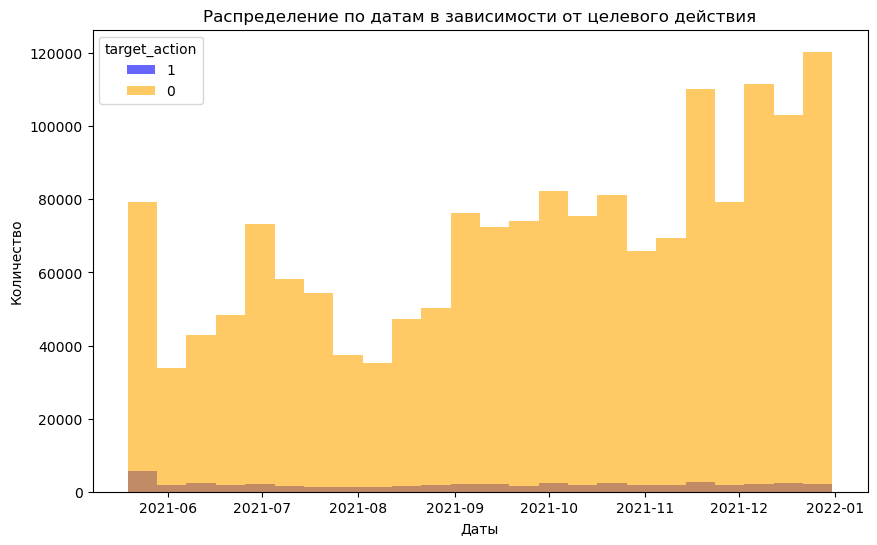

In [196]:
# зависимость целевого действия и даты, 1 - целевое, 0 - нет

colors = {1: 'blue', 0: 'orange',}

fig, ax = plt.subplots(figsize=(10, 6))
for target_action in colors:
    color = colors[target_action]
    data = ga_all_clean[ga_all_clean['target_action'] == target_action]

    ax.hist(data['visit_date'], color=color, alpha=0.6, bins=24)
    
plt.ylabel('Количество')
plt.xlabel('Даты')
plt.title('Распределение по датам в зависимости от целевого действия')
plt.legend(colors, title="target_action");

In [86]:
# Органический трафик — это все визиты с ga_sessions.utm_medium in ('organic', 'referral', '(none)')
# Платный трафик — весь неорганический трафик

In [87]:
ga_all_clean.utm_medium.nunique()

55

In [88]:
ga_all_clean.utm_medium.value_counts(dropna=False)

utm_medium
banner               525206
cpc                  399395
(none)               277060
cpm                  229791
referral             136851
organic               55009
email                 28287
push                  27710
stories               10472
cpv                    7815
blogger_channel        7731
smartbanner            6501
blogger_stories        4226
tg                     3920
cpa                    3266
post                   2227
outlook                1269
app                    1211
smm                    1194
clicks                  908
blogger_header          760
(not set)               405
info_text               335
sms                     194
landing                 127
partner                  95
link                     52
cbaafe                   43
CPM                      36
yandex_cpc               31
vk_smm                   25
static                   17
google_cpc               15
article                  15
web_polka                11
fb_smm   

In [89]:
# добавим новый атрибут
# 1 - органический трафик, 0 - неорганический платный трафик

ga_all_clean['organic_1_inorganic_0'] = ga_all_clean.apply(lambda x: 1 if x.utm_medium in ['organic', 'referral', 
                                                                                           '(none)'] else 0, axis=1)

In [90]:
ga_all_clean.head(3)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,device_category,geo_country,geo_city,target_action,organic_1_inorganic_0
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24 00:00:00+00:00,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,mobile,Russia,Zlatoust,0,0
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14 00:00:00+00:00,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,mobile,Russia,Moscow,0,0
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28 00:00:00+00:00,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,mobile,Russia,Krasnoyarsk,0,0


In [91]:
ga_all_clean.shape

(1732266, 12)

In [92]:
# с точки зрения всего объема трафика показатель платного трафика выше

ga_all_clean['organic_1_inorganic_0'].value_counts()

organic_1_inorganic_0
0    1263346
1     468920
Name: count, dtype: int64

In [93]:
ga_all_clean[ga_all_clean['organic_1_inorganic_0'] == 1]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,device_category,geo_country,geo_city,target_action,organic_1_inorganic_0
5,9055447192389856083.1622453074.1622453074,2108385598.162245,2021-05-31 00:00:00+00:00,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,mobile,Russia,Saint Petersburg,0,1
11,9055469620715506713.1628883994.1628883994,2108390820.162888,2021-08-13 00:00:00+00:00,22:00:00,1,fDLlAcSmythWSCVMvqvL,(none),mobile,Russia,Saint Petersburg,0,1
12,9055469620715506713.1633110583.1633110583,2108390820.162888,2021-10-01 00:00:00+00:00,20:00:00,2,fDLlAcSmythWSCVMvqvL,(none),mobile,Russia,Saint Petersburg,0,1
13,9055469620715506713.1635878177.1635878177,2108390820.162888,2021-11-02 00:00:00+00:00,21:36:17,3,gVRrcxiDQubJiljoTbGm,referral,mobile,Russia,Sochi,0,1
28,9055505230298952295.1638478433.1638478433,2108399111.163848,2021-12-02 00:00:00+00:00,23:53:53,1,fDLlAcSmythWSCVMvqvL,(none),desktop,Russia,Balashikha,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1732251,9055355469082180480.1636350848.1636350848,2108364242.163635,2021-11-08 00:00:00+00:00,08:54:08,1,fDLlAcSmythWSCVMvqvL,(none),mobile,Russia,Moscow,0,1
1732254,9055376699099939975.1630766214.1630766214,2108369185.163077,2021-09-04 00:00:00+00:00,17:00:00,1,fDLlAcSmythWSCVMvqvL,(none),desktop,Russia,Khimki,1,1
1732257,9055394269810294140.1629912447.1629912447,2108373276.162991,2021-08-25 00:00:00+00:00,20:00:00,1,bByPQxmDaMXgpHeypKSM,referral,mobile,Russia,Saint Petersburg,1,1
1732262,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26 00:00:00+00:00,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),mobile,Russia,Stavropol,0,1


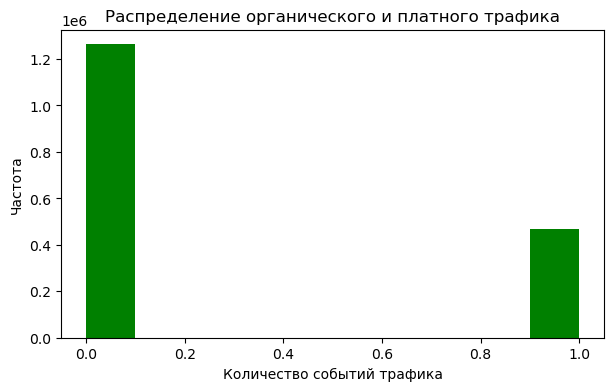

In [94]:
plt.figure(figsize=(7,4))
plt.hist(ga_all_clean.organic_1_inorganic_0, color='green')
plt.xlabel('Количество событий трафика')
plt.ylabel('Частота')
plt.title('Распределение органического и платного трафика');

In [95]:
trafic_CR = ga_all_clean[['organic_1_inorganic_0', 'target_action']]
trafic_CR

,organic_1_inorganic_0,target_action
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1732261,0,0
1732262,1,0
1732263,1,0
1732264,0,0


In [96]:
trafic_CR.value_counts()

organic_1_inorganic_0  target_action
0                      0                1233844
1                      0                 448108
0                      1                  29502
1                      1                  20812
Name: count, dtype: int64

In [97]:
# Органический трафик отличается от платного с точки зрения CR (Conversion Rate) в целевые события
# у органического (бесплатного) трафика CR (Conversion Rate) 0.044383 в целевые события выше, чем у платного 0.23352

organic_1_inorganic_0_CR = trafic_CR.groupby(['organic_1_inorganic_0'], as_index=False).target_action.mean()
organic_1_inorganic_0_CR = organic_1_inorganic_0_CR.rename(columns={'target_action': 'CR'})
organic_1_inorganic_0_CR

,organic_1_inorganic_0,CR
0,0,0.023352
1,1,0.044383


In [98]:
# Проведем проверку следующей гипотезы:
#  Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события
# 1 - органический трафик, 0 - неорганический платный трафик

In [99]:
# Платный и бесплатный трафик только с целевым действием

df_trafic = ga_all_clean[['visit_date', 'organic_1_inorganic_0', 'target_action']][ga_all_clean['target_action'] == 1]
df_trafic

,visit_date,organic_1_inorganic_0,target_action
69,2021-06-14 00:00:00+00:00,0,1
73,2021-11-08 00:00:00+00:00,0,1
76,2021-06-21 00:00:00+00:00,0,1
127,2021-08-28 00:00:00+00:00,1,1
135,2021-08-14 00:00:00+00:00,0,1
...,...,...,...
1732152,2021-11-13 00:00:00+00:00,0,1
1732225,2021-10-13 00:00:00+00:00,0,1
1732227,2021-10-13 00:00:00+00:00,0,1
1732254,2021-09-04 00:00:00+00:00,1,1


In [100]:
df_trafic['organic_1_inorganic_0'].value_counts()

organic_1_inorganic_0
0    29502
1    20812
Name: count, dtype: int64

In [101]:
# определим функцию, которая считает нули 

def count_zero_func(series):
    zero = filter(lambda x: x == 0, series)
    lst = list(zero)
    return lst.count(0)

In [102]:
# определим функцию, которая считает единицы

def count_one_func(series):
    one = filter(lambda x: x == 1, series)
    lst = list(one)
    return lst.count(1)

In [103]:
# проверим, что функция ок

count_zero_func(df_trafic['organic_1_inorganic_0'])

29502

In [104]:
# проверим, что функция ок

count_one_func(df_trafic['organic_1_inorganic_0'])

20812

In [106]:
df = df_trafic.groupby(['visit_date'], as_index=False).agg({'organic_1_inorganic_0' : [count_one_func, count_zero_func]})
df = df.rename(columns={'count_one_func': 'organic', 'count_zero_func': 'paid'})
df

visit_date organic_1_inorganic_0     
                                            organic paid
0   2021-05-19 00:00:00+00:00                    50    0
1   2021-05-22 00:00:00+00:00                    10    1
2   2021-05-23 00:00:00+00:00                    40    6
3   2021-05-24 00:00:00+00:00                  2524   12
4   2021-05-25 00:00:00+00:00                  1302    9
..                        ...                   ...  ...
220 2021-12-27 00:00:00+00:00                    38  195
221 2021-12-28 00:00:00+00:00                    24  215
222 2021-12-29 00:00:00+00:00                    27  192
223 2021-12-30 00:00:00+00:00                    18  152
224 2021-12-31 00:00:00+00:00                     6  101

[225 rows x 3 columns]

In [ ]:
# выборки полностью заполнены, размерность одинаковая

In [153]:
df['organic_1_inorganic_0']['organic'].isna().sum()

0

In [154]:
df['organic_1_inorganic_0']['paid'].isna().sum()

0

In [ ]:
# Проверка следующей гипотезы:
# Нулевая гипотеза H0- органический трафик НЕ отличается от платного с точки зрения CR (Conversion Rate) в целевые события
# Альтернативная гипотеза H1 - органический трафик отличается от платного

# 1 - органический трафик, 0 - неорганический платный трафик

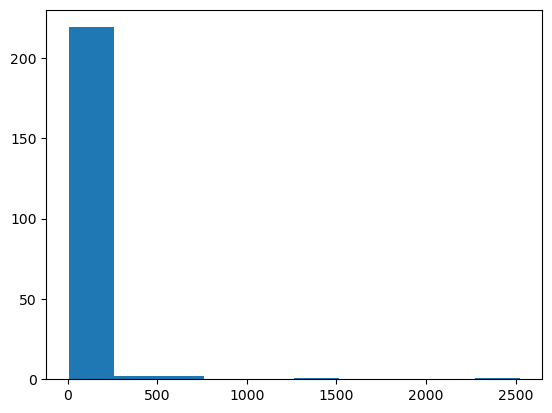

In [168]:

plt.hist(df['organic_1_inorganic_0']['organic']);

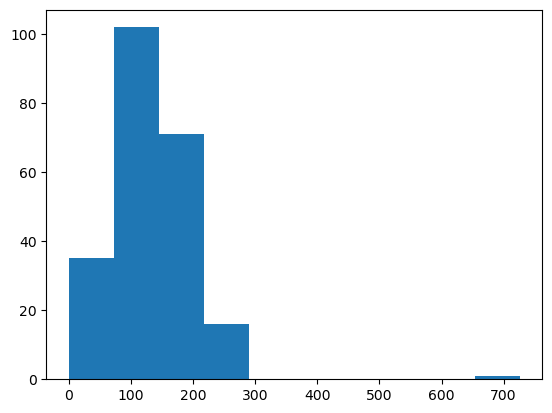

In [160]:

plt.hist(df['organic_1_inorganic_0']['paid']);

In [169]:
# проверим гипотезу (H0) о нормальности данных (распределения) с помощью теста Шапиро-Уилка

stats.shapiro(df['organic_1_inorganic_0']['organic'])

ShapiroResult(statistic=0.22943931818008423, pvalue=1.639624809973275e-29)

In [170]:
stats.shapiro(df['organic_1_inorganic_0']['paid'])

ShapiroResult(statistic=0.8488698601722717, pvalue=4.70194494233897e-14)

In [ ]:
# pvalue очень мало (меньше уровня значимости 5%) отвергаем нулевую гипотезу о том, что данные распределены нормально

In [176]:
# выборки не подчиняются нормальному распределению, независимы
# Статистический критерий Манна-Уитни

stats.mannwhitneyu(df['organic_1_inorganic_0']['organic'], df['organic_1_inorganic_0']['paid'])

MannwhitneyuResult(statistic=10427.5, pvalue=3.791725590206533e-27)

In [ ]:
# pvalue очень мало (меньше уровня значимости 5%), значит отвергаем нулевую гипотезу H0 
# и принимаем альтернативную гипотезу H1 - органический трафик отличается от платного (two-tailed test)

In [111]:
# посмотрим на распределение мобильных и десктопных устройств

ga_all_clean.device_category.unique()

array(['mobile', 'tablet', 'desktop'], dtype=object)

In [112]:
ga_all_clean.device_category.describe()

count     1732266
unique          3
top        mobile
freq      1368679
Name: device_category, dtype: object

In [113]:
# общий объем трафика

stats_device_category = ga_all_clean.groupby(['device_category'], as_index=False)[['session_id']].count()
stats_device_category = stats_device_category.rename(columns={'session_id': 'count'})
stats_device_category

,device_category,count
0,desktop,346891
1,mobile,1368679
2,tablet,16696


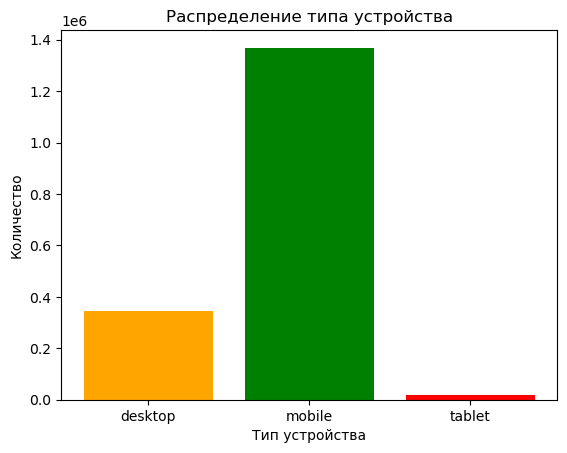

In [114]:
plt.bar(stats_device_category['device_category'], stats_device_category['count'], color=['orange', 'green', 'red'])
plt.xlabel('Тип устройства')
plt.ylabel('Количество')
plt.title('Распределение типа устройства');


In [115]:
# Выделим только мобильные и только десктопные устройства (без tablet)

df_device_category = ga_all_clean[['device_category', 'target_action']][(ga_all_clean['device_category'] == 'mobile') | (ga_all_clean['device_category'] == 'desktop')]
df_device_category

,device_category,target_action
0,mobile,0
1,mobile,0
2,mobile,0
3,mobile,0
4,mobile,0
...,...,...
1732261,desktop,0
1732262,mobile,0
1732263,mobile,0
1732264,mobile,0


In [116]:
df_device_category.value_counts()

device_category  target_action
mobile           0                1330300
desktop          0                 335378
mobile           1                  38379
desktop          1                  11513
Name: count, dtype: int64

In [117]:
#  Трафик с моб устройств отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события
#  CR с десктопных устройств выше, чем с моб с точки зрения CR (Conversion Rate) в целевые события

device_category_CR = df_device_category.groupby('device_category', as_index=False).agg({'target_action':'mean'})
device_category_CR = device_category_CR.rename(columns={'target_action': 'CR'})
device_category_CR

,device_category,CR
0,desktop,0.033189
1,mobile,0.028041


In [118]:
# Проверка следующей гипотезы:
# Трафик с моб устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события

In [119]:
#  mobile и desktop только с целевым действием

df2_trafic = ga_all_clean[['visit_date', 'device_category' , 'target_action']][(ga_all_clean['target_action'] == 1) & ((ga_all_clean['device_category'] == 'mobile') | (ga_all_clean['device_category'] == 'desktop'))]
df2_trafic

,visit_date,device_category,target_action
69,2021-06-14 00:00:00+00:00,mobile,1
73,2021-11-08 00:00:00+00:00,mobile,1
76,2021-06-21 00:00:00+00:00,desktop,1
127,2021-08-28 00:00:00+00:00,mobile,1
135,2021-08-14 00:00:00+00:00,mobile,1
...,...,...,...
1732152,2021-11-13 00:00:00+00:00,mobile,1
1732225,2021-10-13 00:00:00+00:00,mobile,1
1732227,2021-10-13 00:00:00+00:00,mobile,1
1732254,2021-09-04 00:00:00+00:00,desktop,1


In [120]:
df2_trafic.device_category.value_counts()

device_category
mobile     38379
desktop    11513
Name: count, dtype: int64

In [121]:
# определим функцию, которая считает mobile 

def count_mobile_func(series):
    mobile= filter(lambda x: x == 'mobile', series)
    lst = list(mobile)
    return lst.count('mobile')

In [122]:
count_mobile_func(df2_trafic['device_category'])

38379

In [123]:
# определим функцию, которая считает desktop

def count_desktop_func(series):
    desktop = filter(lambda x: x == 'desktop', series)
    lst = list(desktop)
    return lst.count('desktop')

In [124]:
count_desktop_func(df2_trafic['device_category'])

11513

In [125]:
df2 = df2_trafic.groupby(['visit_date'], as_index=False).agg({'device_category': [count_mobile_func, count_desktop_func]})
df2 = df2.rename(columns={'count_mobile_func': 'mobile', 'count_desktop_func': 'desktop'})
df2

visit_date device_category        
                                       mobile desktop
0   2021-05-19 00:00:00+00:00              22      28
1   2021-05-22 00:00:00+00:00               7       4
2   2021-05-23 00:00:00+00:00              32      14
3   2021-05-24 00:00:00+00:00            1513    1001
4   2021-05-25 00:00:00+00:00             835     472
..                        ...             ...     ...
220 2021-12-27 00:00:00+00:00             195      37
221 2021-12-28 00:00:00+00:00             220      19
222 2021-12-29 00:00:00+00:00             200      16
223 2021-12-30 00:00:00+00:00             158       9
224 2021-12-31 00:00:00+00:00             104       2

[225 rows x 3 columns]

In [ ]:
# выборки полностью заполнены, размерность одинаковая

In [155]:
df2['device_category']['mobile'].isna().sum()

0

In [156]:
df2['device_category']['desktop'].isna().sum()

0

In [ ]:
# Проверка следующей гипотезы:
# Нулевая гипотеза H0 - трафик с мобильных устройств НЕ отличается от трафика с десктопных устройств с точки зрения 
# CR (Conversion Rate) в целевые события
# Альтернативная гипотеза H1 - трафик с мобильных устройств отличается от трафика с десктопных устройств (Two-tailed test)


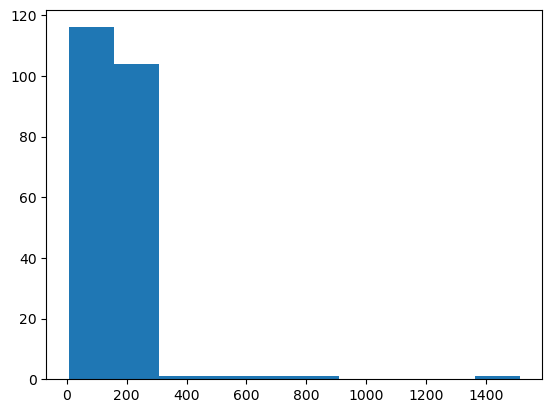

In [163]:

plt.hist(df2['device_category']['mobile']);

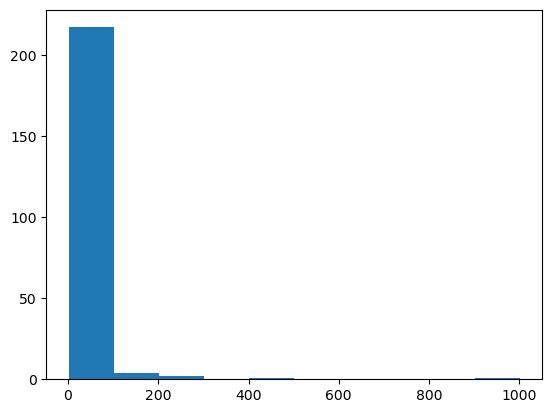

In [164]:

plt.hist(df2['device_category']['desktop']);

In [171]:
# проверим гипотезу о нормальности данных (распределения) с помощью теста Шапиро-Уилка

stats.shapiro(df2['device_category']['mobile'])

ShapiroResult(statistic=0.44298356771469116, pvalue=6.047863759635107e-26)

In [172]:
stats.shapiro(df2['device_category']['desktop'])

ShapiroResult(statistic=0.30052125453948975, pvalue=2.0133671638624164e-28)

In [ ]:
# pvalue очень мало (меньше уровня значимости 5%) отвергаем нулевую гипотезу о том, что данные распределены нормально

In [179]:
# выборки не подчиняются нормальному распределению, независимы
# Статистический критерий Манна-Уитни

stats.mannwhitneyu(df2['device_category']['mobile'], df2['device_category']['desktop'])

MannwhitneyuResult(statistic=48897.0, pvalue=1.5315756706699596e-65)

In [ ]:
# pvalue очень мало (меньше уровня значимости 5%), значит отвергаем нулевую гипотезу H0 
# и принимаем альтернативную гипотезу H1 - трафик с мобильных устройств отличается от трафика с десктопных устройств

In [126]:
# реклама в социальных сетях

ga_all_clean.utm_source.nunique()

281

In [127]:
ga_all_clean['social media advertising'] = ga_all_clean.apply(lambda x: 'social media advertising' if x.utm_source in ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 
'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm'] else 'other', axis=1)

In [128]:
ga_all_clean.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,device_category,geo_country,geo_city,target_action,organic_1_inorganic_0,social media advertising
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24 00:00:00+00:00,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,mobile,Russia,Zlatoust,0,0,other
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14 00:00:00+00:00,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,mobile,Russia,Moscow,0,0,social media advertising
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28 00:00:00+00:00,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,mobile,Russia,Krasnoyarsk,0,0,other
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29 00:00:00+00:00,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,mobile,Russia,Moscow,0,0,other
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29 00:00:00+00:00,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,mobile,Russia,Moscow,0,0,other


In [129]:
ga_all_clean['social media advertising'].value_counts()

social media advertising
other                       1475986
social media advertising     256280
Name: count, dtype: int64

In [130]:
# распределение рекламы

advertising = ga_all_clean.groupby(['social media advertising'], as_index=False)['session_id'].count()
advertising = advertising.rename(columns={'session_id': 'count'})
advertising

,social media advertising,count
0,other,1475986
1,social media advertising,256280


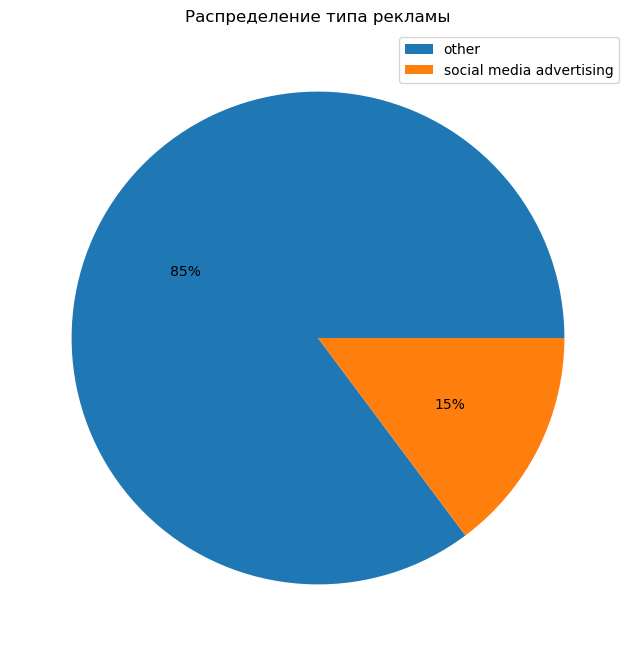

In [131]:
plt.figure(figsize=(12, 8))
plt.pie(advertising['count'], labels=advertising['social media advertising'], labeldistance=None, autopct = '%1.0f%%')
plt.title("Распределение типа рекламы")
plt.legend()
plt.show();

In [132]:
# распределение, включая target_action

advertising_CR = ga_all_clean.groupby(['social media advertising', 'target_action'], as_index=False)[['session_id']].count()
advertising_CR = advertising_CR.rename(columns={'session_id': 'count'})
advertising_CR

,social media advertising,target_action,count
0,other,0,1429693
1,other,1,46293
2,social media advertising,0,252259
3,social media advertising,1,4021


In [133]:
# Стоит ли увеличивать своё присутствие в соцсетях и давать там больше рекламы?
# С точки зрения CR (Conversion Rate) иные каналы привлечения имеют более высокую конверсию в целевые события

advertising_CR = ga_all_clean.groupby(['social media advertising'], as_index=False)['target_action'].mean()
advertising_CR = advertising_CR.rename(columns={'target_action': 'CR'})
advertising_CR

,social media advertising,CR
0,other,0.031364
1,social media advertising,0.015690


In [134]:
# Трафик из городов присутствия (Москва и область, Санкт-Петербург) и иных регионов 

In [135]:
ga_all_clean.head(3)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,device_category,geo_country,geo_city,target_action,organic_1_inorganic_0,social media advertising
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24 00:00:00+00:00,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,mobile,Russia,Zlatoust,0,0,other
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14 00:00:00+00:00,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,mobile,Russia,Moscow,0,0,social media advertising
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28 00:00:00+00:00,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,mobile,Russia,Krasnoyarsk,0,0,other


In [136]:
ga_all_clean.shape


(1732266, 13)

In [137]:
ga_all_clean.geo_country.value_counts()

geo_country
Russia                 1682423
Ukraine                   8455
United States             8141
Belarus                   3432
Kazakhstan                2109
                        ...   
Paraguay                     1
New Caledonia                1
Puerto Rico                  1
Yemen                        1
Congo - Brazzaville          1
Name: count, Length: 159, dtype: int64

In [138]:
ga_all_clean.geo_city.value_counts()

geo_city
Moscow              750928
Saint Petersburg    278402
(not set)            73297
Yekaterinburg        33555
Krasnodar            30260
                     ...  
Oldbury                  1
Bad Breisig              1
Ilza                     1
Svishtov                 1
Compiegne                1
Name: count, Length: 2389, dtype: int64

In [139]:
ga_all_clean.geo_city.values.tolist()

['Zlatoust',
 'Moscow',
 'Krasnoyarsk',
 'Moscow',
 'Moscow',
 'Saint Petersburg',
 'Saint Petersburg',
 'Saint Petersburg',
 'Moscow',
 'Moscow',
 'Moscow',
 'Saint Petersburg',
 'Saint Petersburg',
 'Sochi',
 'Saint Petersburg',
 'Yaroslavl',
 'Saint Petersburg',
 'Mytishchi',
 '(not set)',
 'Saint Petersburg',
 'Novorossiysk',
 'Moscow',
 'Moscow',
 'Moscow',
 'Moscow',
 'Moscow',
 'Moscow',
 'Moscow',
 'Balashikha',
 'Pushkino',
 'Pushkino',
 'Saint Petersburg',
 'Moscow',
 'Moscow',
 'Vladivostok',
 'Alexandrov',
 'Astrakhan',
 'Moscow',
 'Moscow',
 'Moscow',
 'Moscow',
 'Novorossiysk',
 'Vladivostok',
 'Saint Petersburg',
 'Sunny Isles Beach',
 'Sochi',
 'Saint Petersburg',
 'Reutov',
 'Moscow',
 'Saint Petersburg',
 'Moscow',
 'Moscow',
 'Kazan',
 'Ulyanovsk',
 'Moscow',
 'Moscow',
 'Moscow',
 'Moscow',
 'Tula',
 'Tula',
 'Moscow',
 'Moscow',
 'Moscow',
 'Saint Petersburg',
 'Saint Petersburg',
 'Saint Petersburg',
 'Krasnoyarsk',
 'Saint Petersburg',
 'Yekaterinburg',
 'Moscow'

In [140]:
# Выделяем Москву, моск обл и Санкт-Петербург
# 1 - если Москва и моск область, Санкт-Петербург, 0 - если иное

ga_all_clean['geo_city_main'] = ga_all_clean.apply(lambda x: 1 if x.geo_city in ['Moscow', 'Saint Petersburg', 'Mytishchi', 
                                                                                 'Balashikha', 'Pushkino', 'Reutov', 'Domodedovo', 
                                                                                 'Nakhabino', 'Stupino', 'Serpukhov', 'Fryazino', 
                                                                                 'Kotelniki', 'Zheleznodorozhny', 'Naro-Fominsk', 
                                                                                 'Protvino', 'Zhukovskiy', 'Ivanteyevka', 'Yegoryevsk', 
                                                                                 'Korolyov', 'Nakhabino', 'Fryazino', 'Vidnoye', 'Kraskovo', 
                                                                                 'Safonovo', 'Khimki', 'Odintsovo', 'Kolomna'] else 0, axis=1)
ga_all_clean.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,device_category,geo_country,geo_city,target_action,organic_1_inorganic_0,social media advertising,geo_city_main
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24 00:00:00+00:00,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,mobile,Russia,Zlatoust,0,0,other,0
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14 00:00:00+00:00,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,mobile,Russia,Moscow,0,0,social media advertising,1
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28 00:00:00+00:00,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,mobile,Russia,Krasnoyarsk,0,0,other,0
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29 00:00:00+00:00,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,mobile,Russia,Moscow,0,0,other,1
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29 00:00:00+00:00,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,mobile,Russia,Moscow,0,0,other,1


In [141]:
# общий объем трафика (все события) выше по Москве и моск области, Санкт-Петербургу

ga_all_clean['geo_city_main'].value_counts(dropna=False)

geo_city_main
1    1092509
0     639757
Name: count, dtype: int64

In [142]:
df_geo_city = ga_all_clean[['geo_city_main', 'target_action']]
df_geo_city

,geo_city_main,target_action
0,0,0
1,1,0
2,0,0
3,1,0
4,1,0
...,...,...
1732261,1,0
1732262,0,0
1732263,1,0
1732264,0,0


In [143]:
df_geo_city.value_counts()

geo_city_main  target_action
1              0                1059734
0              0                 622218
1              1                  32775
0              1                  17539
Name: count, dtype: int64

In [144]:
# CR городов присутствия (Москва и область, Санкт-Петербург) выше CR из иных регионов с точки зрения Conversion Rate в целевые события

df_geo_city_CR = ga_all_clean.groupby(['geo_city_main'], as_index=False).target_action.mean()
df_geo_city_CR = df_geo_city_CR.rename(columns={'target_action': 'CR'})
df_geo_city_CR

,geo_city_main,CR
0,0,0.027415
1,1,0.030000


In [146]:
# выделим все города только с целевым действием
# 1 - если Москва и моск область, Санкт-Петербург   # 0 - если иное

df3_trafic = ga_all_clean[['visit_date', 'geo_city_main' , 'target_action']][(ga_all_clean['target_action'] == 1)]
df3_trafic

,visit_date,geo_city_main,target_action
69,2021-06-14 00:00:00+00:00,1,1
73,2021-11-08 00:00:00+00:00,0,1
76,2021-06-21 00:00:00+00:00,1,1
127,2021-08-28 00:00:00+00:00,0,1
135,2021-08-14 00:00:00+00:00,1,1
...,...,...,...
1732152,2021-11-13 00:00:00+00:00,1,1
1732225,2021-10-13 00:00:00+00:00,0,1
1732227,2021-10-13 00:00:00+00:00,0,1
1732254,2021-09-04 00:00:00+00:00,1,1


In [147]:
df3_trafic.geo_city_main.value_counts()

geo_city_main
1    32775
0    17539
Name: count, dtype: int64

In [148]:
# воспользуемся функцией, которая считает единицы

count_one_func(df3_trafic['geo_city_main'])

32775

In [149]:
# воспользуемся функцией, которая считает нули

count_zero_func(df3_trafic['geo_city_main'])

17539

In [150]:
df3 = df3_trafic.groupby(['visit_date'], as_index=False).agg({'geo_city_main': [count_one_func, count_zero_func]})
df3 = df3.rename(columns={'count_one_func': 'Moscow_Peter_oblast', 'count_zero_func': 'other'})
df3

visit_date       geo_city_main      
                              Moscow_Peter_oblast other
0   2021-05-19 00:00:00+00:00                  50     0
1   2021-05-22 00:00:00+00:00                   9     2
2   2021-05-23 00:00:00+00:00                  33    13
3   2021-05-24 00:00:00+00:00                1686   850
4   2021-05-25 00:00:00+00:00                 853   458
..                        ...                 ...   ...
220 2021-12-27 00:00:00+00:00                 110   123
221 2021-12-28 00:00:00+00:00                 123   116
222 2021-12-29 00:00:00+00:00                 119   100
223 2021-12-30 00:00:00+00:00                  87    83
224 2021-12-31 00:00:00+00:00                  56    51

[225 rows x 3 columns]

In [ ]:
# выборки полностью заполнены, размерность одинаковая

In [157]:
df3['geo_city_main']['Moscow_Peter_oblast'].isna().sum()

0

In [158]:
df3['geo_city_main']['other'].isna().sum()

0

In [ ]:
# Проверка следующей гипотезы:
# Нулевая гипотеза H0 -  трафик из городов присутствия (Москва и область, Санкт-Петербург) НЕ отличается от трафика 
# из иных регионов с точки зрения CR (Conversion Rate) в целевые события

# Альтернативная гипотеза H1 - трафик из городов присутствия (Москва и область, Санкт-Петербург) отличается от трафика 
# из иных регионов (Two-tailed test)

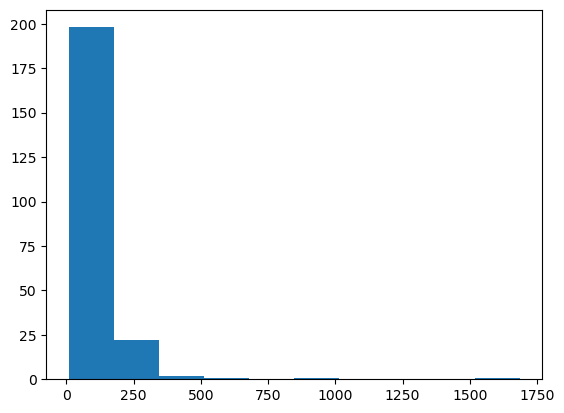

In [165]:

plt.hist(df3['geo_city_main']['Moscow_Peter_oblast']);

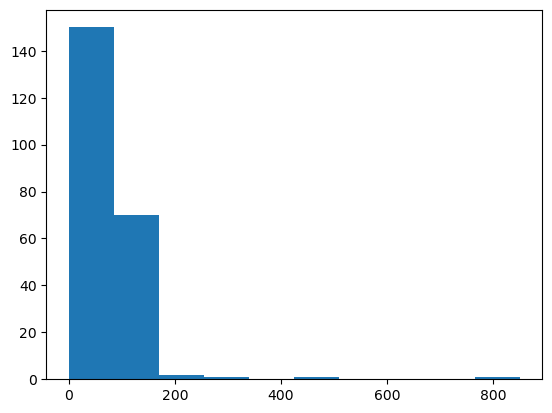

In [166]:

plt.hist(df3['geo_city_main']['other']);

In [173]:
# проверим гипотезу о нормальности данных (распределения) с помощью теста Шапиро-Уилка

stats.shapiro(df3['geo_city_main']['Moscow_Peter_oblast'])

ShapiroResult(statistic=0.3225633502006531, pvalue=4.565677896677407e-28)

In [174]:
stats.shapiro(df3['geo_city_main']['other'])

ShapiroResult(statistic=0.48171132802963257, pvalue=3.472738761143977e-25)

In [ ]:
# pvalue очень мало (меньше уровня значимости 5%) отвергаем нулевую гипотезу о том, что данные распределены нормально

In [180]:
# выборки не подчиняются нормальному распределению, независимы

# Статистический критерий Манна-Уитни

stats.mannwhitneyu(df3['geo_city_main']['Moscow_Peter_oblast'], df3['geo_city_main']['other'])

MannwhitneyuResult(statistic=44334.0, pvalue=2.9174164855658323e-43)

In [ ]:
# pvalue очень мало (меньше уровня значимости 5%), значит отвергаем нулевую гипотезу H0 
# и принимаем альтернативную гипотезу H1 - трафик из городов присутствия (Москва и область, Санкт-Петербург) 
# отличается от трафика из иных регионов

In [183]:
# stats.mannwhitneyu(df3['geo_city_main']['Moscow_Peter_oblast'], df3['geo_city_main']['other'], alternative='greater')

MannwhitneyuResult(statistic=44334.0, pvalue=1.4587082427829162e-43)

In [197]:
# Итог проверки гипотез: 
# органический трафик отличается от платного трафика, 
# трафик с моб устройств отличается от трафика с десктопных устройств, 
# трафик из городов присутствия (Москва и область, Санкт-Петербург) отличается от трафика из иных регионов
